### 02 - **Framebuffers**

This notebook gives a basic introduction to framebuffers and how we use them in practice.

We will visualize the process of taking an image we want to render and get it ready to be drawn to the screen.

### *What is a framebuffer?*


A framebuffer is a region of memory that organizes and stores information about an image that's used to render it. In Project 1, you will be interacting with a color buffer, which is used to store color data for an image. 

Here's a flow diagram showing how the color (RGB) buffer works: 

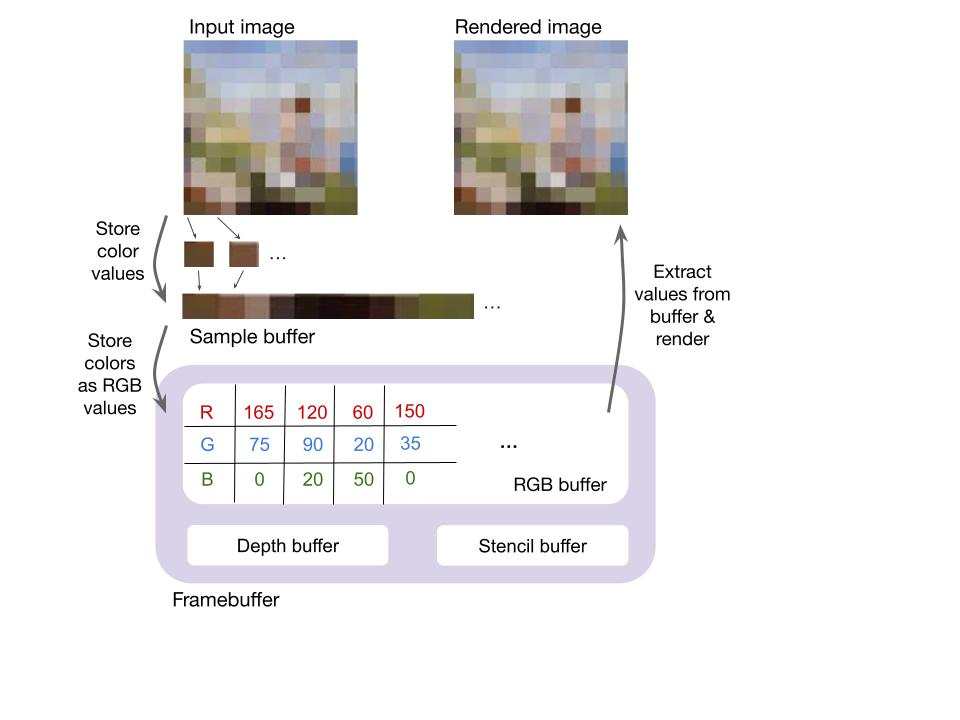





### *Why is it important?*


A framebuffer is important because it is the final format we put our data in and the format that the display expects to receive. Although, we have a very simple rendering process here, we'll do more complicated things in the project and converting to the framebuffer will become more important.

## Demo

In [1]:
class Color():
  """
  r, g, b values are all between 0 and 1
  """
  def __init__(self, r, g, b):
    self.r = r
    self.g = g
    self.b = b
    self.val = [self.r, self.g, self.b]

# Very basic (and boring) version - you will work on a better version of this in the project!
def img_to_sample_buffer(image):
  h, w, c = image.shape
  sample_buffer = [None] * (h*w)

  # TODO: Store the image's pixel data in the sample buffer
  for y in range(h):
    for x in range(w):
      r, g, b = image[y][x]
      sample_buffer[y * w + x] = Color(r, g, b)

  return sample_buffer

def image_to_framebuffer(image, sample_buffer, rgb_framebuffer_target):
  """
  image: 3D numpy array - image we want to render
  sample_buffer: 1D array of Color objects representing the color we want set for each pixel
  rgb_framebuffer_target: 1D numpy array of ints between 0 and 255 representing the colors we draw to the screen

  Assume sample_buffer and rgb_framebuffer_target are correctly sized
  """
  h, w, c = image.shape

  # TODO: Extract RGB data from the sample buffer and populate rgb_framebuffer_target
  for y in range(h):
    for x in range(w):
      color = sample_buffer[y * w + x]
      for c in range(3):
        rgb_framebuffer_target[3 * (y * w + x) + c] = int(color.val[c] * 255)

  return rgb_framebuffer_target

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


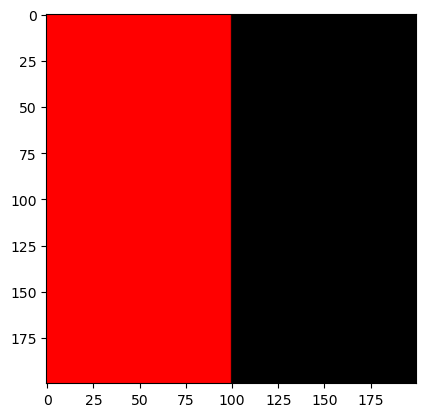

In [2]:
import matplotlib.pyplot as plt
import numpy as np

width = 200
height = 200

img = np.zeros((height,width,3)) # We could also load an existing image
img[:,:int(width/2),:] = [255,0,0]

sample_buffer = img_to_sample_buffer(img) # We can change this to test the other one

rgb_framebuffer_target = np.zeros((height*width)*3, dtype=int)

rgb_framebuffer_target = image_to_framebuffer(img, sample_buffer, rgb_framebuffer_target)
plt.imshow(rgb_framebuffer_target.reshape((height, width, 3)))